In [1]:
class AnswerDict(dict):
    def __getitem__(self, key):
        return 42

In [2]:
ad = AnswerDict(a='foo')

In [3]:
ad

{'a': 42}

In [4]:
ad['b']

42

In [6]:
d = {}
d.update(ad)
d

{'a': 'foo'}

In [7]:
d['a']

'foo'

In [17]:
class A:
    def ping(self):
        print('ping:', self)

class B(A):
    def pong(self):
        print('pong:', self)

class C(A):
    def pong(self):
        print('PONG:', self)

class D(B,C):
    def ping(self):
        super().ping()
        print('post-ping:', self)
    
    def pingpong(self):
        self.ping()
        super().ping()
        self.pong()
        super().pong()
        C.pong(self)

In [9]:
d=D()
d.pong()

pong: <__main__.D object at 0x0000017EFB1EA488>


In [10]:
C.pong(d)

PONG: <__main__.D object at 0x0000017EFB1EA488>


In [14]:
D.__mro__

(__main__.D, __main__.B, __main__.C, __main__.A, object)

In [15]:
d.ping()

ping: <__main__.D object at 0x0000017EFB1EA488>
post-ping: <__main__.D object at 0x0000017EFB1EA488>


In [18]:
d.pingpong()

ping: <__main__.D object at 0x0000017EFB1EA488>
post-ping: <__main__.D object at 0x0000017EFB1EA488>
ping: <__main__.D object at 0x0000017EFB1EA488>
pong: <__main__.D object at 0x0000017EFB1EA488>
pong: <__main__.D object at 0x0000017EFB1EA488>
PONG: <__main__.D object at 0x0000017EFB1EA488>


方法解析顺序不仅考虑继承图，还考虑子类声明中列出超类的顺序。也就是说，如果在 diamond.py 文件（见示例 12-4）中把 D 类声明为class D(C, B):，那么 D 类的 __mro__ 属性就会不一样：先搜索 C类，再搜索 B 类。

In [19]:
bool.__mro__

(bool, int, object)

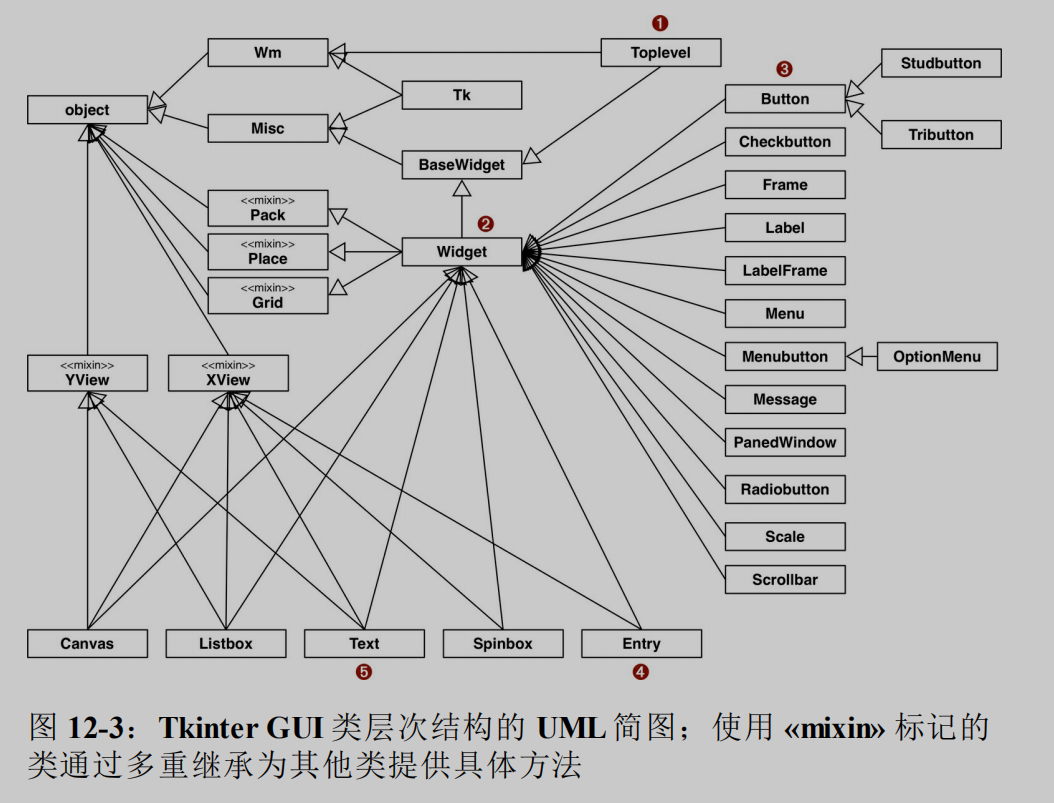